# Medical cost - Regression Problem

In [263]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import sklearn.metrics 
from sklearn.metrics import r2_score
df = pd.read_csv(r'C:\Users\USER\Desktop\מבוא למדעי הנתונים\insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


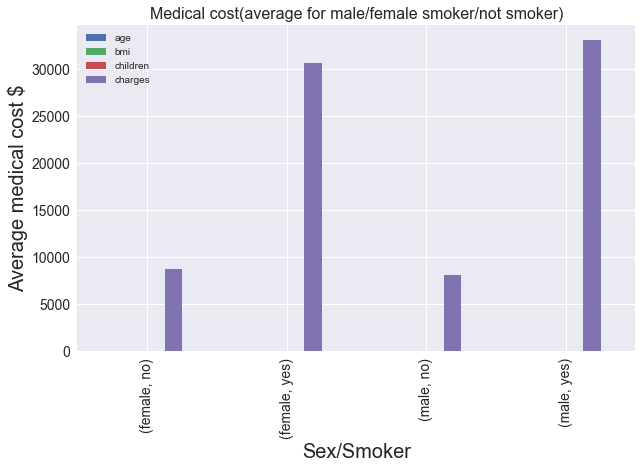

In [264]:
%matplotlib inline
plt.style.use("seaborn")
X = df.groupby(["sex","smoker"]).mean()
X.plot(kind = "bar", figsize = (10, 6), fontsize = 14)
plt.xlabel("Sex/Smoker", fontsize = 20)
plt.ylabel("Average medical cost $", fontsize = 20)
plt.title("Medical cost(average for male/female smoker/not smoker)", fontsize = 16)
plt.show()

From the graph above we can see a direct correlation to insurance cost among smokers and non smokers 

In [265]:
df.groupby(["region"]).size()

region
northeast    324
northwest    325
southeast    364
southwest    325
dtype: int64

Changing String data into numaric data:

In [266]:
df = df.replace({'yes': 1 , 'no':0})
df = df.replace({'northeast': 0 , 'northwest': 1, 'southeast': 2, 'southwest': 3})
df = df.replace({'male' : 1 , 'female' : 0})

In [267]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


# Linear Regression:

In [268]:
y = df['charges']
X = df[['age','bmi','children','smoker','sex','region']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print(linreg.intercept_)
print(list(zip(['age','bmi','children','smoker','sex','region'], linreg.coef_)))

-11074.74865855589
[('age', 252.0783081571687), ('bmi', 316.554730115887), ('children', 364.49255776294933), ('smoker', 24069.87438208202), ('sex', -270.1850952981235), ('region', -259.2312640940853)]


When taking all the features into consideration this will be our linear eqaution:

y = -11074.748 + 252.078 X age + 316.554 X bmi + 364.49 X children + 24069.87 X smoker - 270.18 X sex - 259.23 X region

#### Mean Absolute Error (MAE):

In [269]:
y_pred = linreg.predict(X_test)
print(metrics.mean_absolute_error(y_test, y_pred))

4019.636706785273


#### Mean Squared Error (MSE):

In [270]:
print(metrics.mean_squared_error(y_test, y_pred))

35807072.80613922


#### Root Mean Squared Error (RMSE):

In [271]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

5983.901136059922


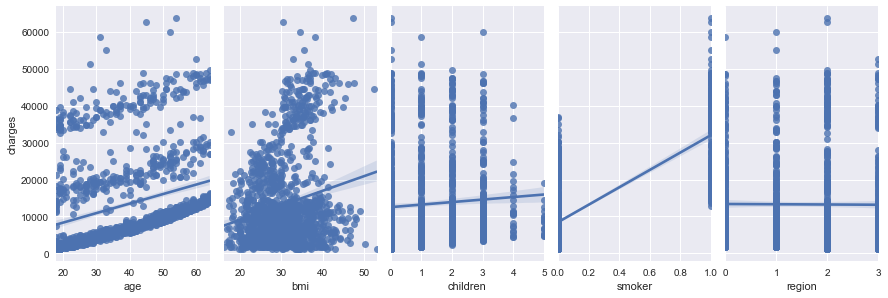

In [272]:
sns.pairplot(df, x_vars=['age','bmi','children','smoker','region'], y_vars='charges', height=4, aspect=0.6, kind='reg')

### Predicted Accuracy (R-squared) :
The coefficient of multiple determination for multiple regression

In [273]:
sklearn.metrics.r2_score(np.array(y_test), np.array(y_pred))

0.7338069544102044

From the results above we can see that our linear module has around 73.38% of accuarcy when it comes to predicting the insurance cost

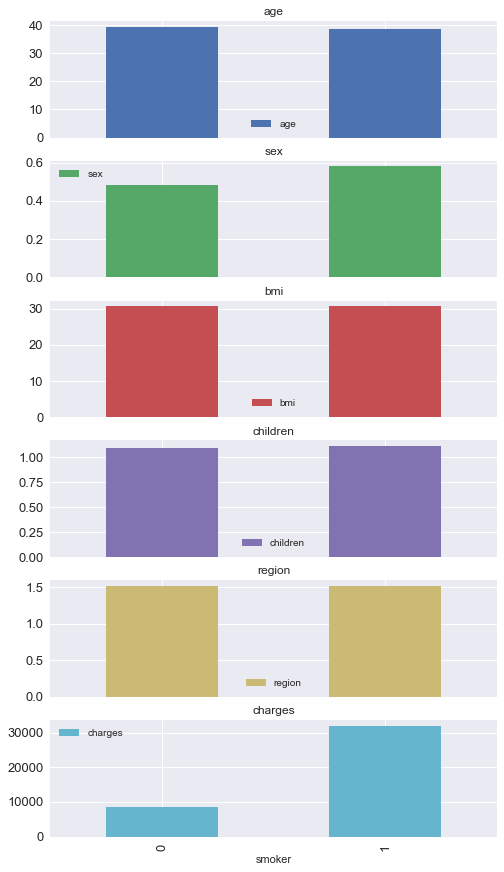

In [274]:
df.groupby('smoker').mean().plot(kind = "bar", subplots = True, figsize = (8,15), fontsize = 13)
plt.show()

from the bar graph above we can the see the average data for smokers/non smokers and we can see that the rest of the data is pretty much equal except the charges cost

### Heat map:

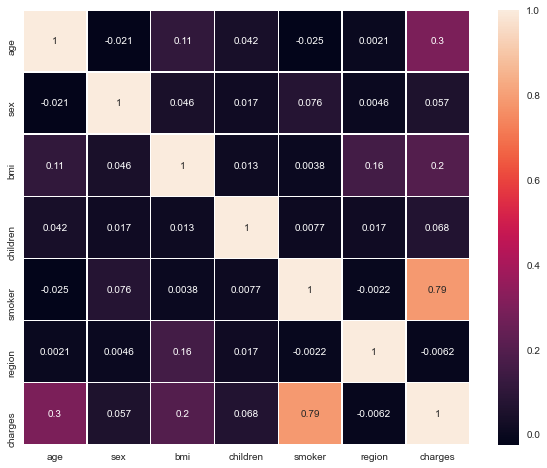

In [275]:
axes = plt.subplots(1, 1, figsize=(10, 8))
axes = sns.heatmap(df.corr(), annot=True , linewidths=0.5)

From the heat graph above we can see that the main features correlated to charges are : age , bmi , smoker , children

### Improving the module by taking the relevant data

In [276]:
X = df[['smoker','bmi','age','children']]
y = df.charges
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)
linreg.fit(x_train, y_train)
y_pred = linreg.predict(x_test)
r2 = sklearn.metrics.r2_score(np.array(y_test), np.array(y_pred))
print("R-squared score :",r2)

R-squared score : 0.7952376940081072


### Using Polynomial Features for improvment :

In [277]:
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures()
x_pol = pol.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(x_pol, y, random_state=0)
linreg.fit(x_train, y_train)
y_pred = linreg.predict(x_test)
r2 = sklearn.metrics.r2_score(np.array(y_test), np.array(y_pred))
print("R-squared score :",r2)

R-squared score : 0.8849604493599111


### Cross Validiation:

In [278]:
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(linreg, x_pol , y, cv = 10)
r2 = sklearn.metrics.r2_score(y, predicted)
print("R-squared score :",r2)

R-squared score : 0.8402174141277496


When using cross valdiation the accuracy of the data went down in 4% but still remained high so we can asumme that the module is good and not by chance 

In [279]:
print("Mean Absolute Error (MAE):",metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):",metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error (MAE): 2771.736444567272
Mean Squared Error (MSE): 18111195.60667826
Root Mean Squared Error (RMSE): 4255.725038895048


In [280]:
df = pd.read_csv(r'C:\Users\USER\Desktop\מבוא למדעי הנתונים\insurance.csv')

### Spliting bmi to categories

In [281]:
df['bmi'].max()

53.13

In [282]:
df['bmi'].min()

15.96

In [283]:
df['bmi'].std()

6.098186911679017

In [284]:
df['bmi'] = df['bmi'].mask((df['bmi'] > 15) & (df['bmi'] < 22), 0)
df['bmi'] = df['bmi'].mask((df['bmi'] >= 22) & (df['bmi'] < 28), 1)
df['bmi'] = df['bmi'].mask((df['bmi'] >= 28) & (df['bmi'] < 34), 2)
df['bmi'] = df['bmi'].mask((df['bmi'] >= 34) & (df['bmi'] < 40), 3)
df['bmi'] = df['bmi'].mask((df['bmi'] >= 40) & (df['bmi'] < 46), 4)
df['bmi'] = df['bmi'].mask((df['bmi'] >= 46), 5)

In [285]:
group = df.groupby(['sex','smoker','bmi']).mean()

In [286]:
x = group.charges

In [287]:
group.drop(['children' ,'age'], axis = 1, inplace=True)

In [288]:
x = group.charges
group

charges
sex    smoker bmi              
female no     0.0   6516.087025
              1.0   9125.057640
              2.0   8641.036491
              3.0   9206.155702
              4.0   8487.898230
              5.0  10778.361475
       yes    0.0  17653.910085
              1.0  22276.676052
              2.0  33339.229704
              3.0  44056.649384
              4.0  42448.561625
              5.0  51915.714670
male   no     0.0   6184.122919
              1.0   7619.770063
              2.0   8290.934248
              3.0   9108.969239
              4.0   8153.422769
              5.0   5858.093850
       yes    0.0  17421.964664
              1.0  21653.431562
              2.0  33210.037417
              3.0  41360.240550
              4.0  44983.132335
              5.0  44501.398200

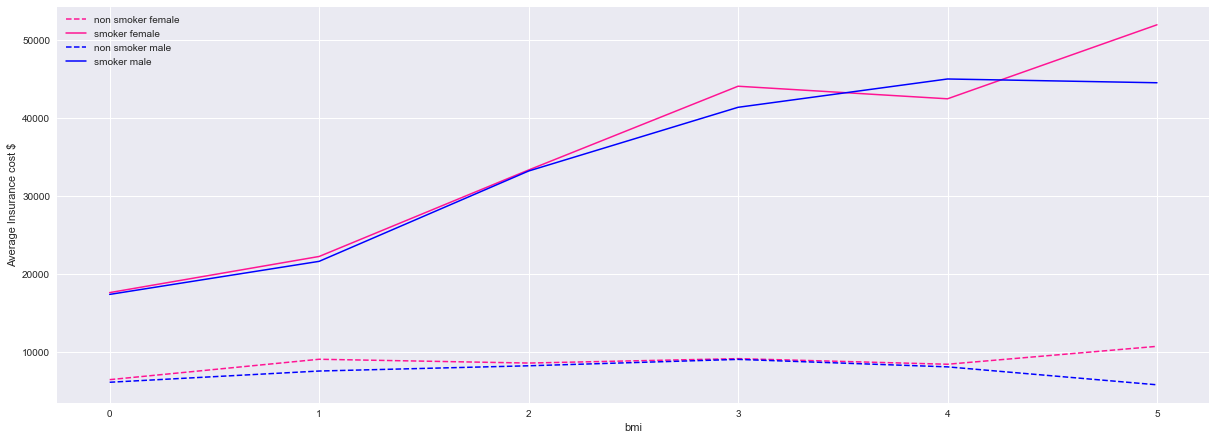

bmi = 0 : 15-22
bmi = 1 : 22-28
bmi = 2 : 28-34
bmi = 3 : 34-40
bmi = 4 : 40-46
bmi = 5 : 46-52


In [289]:
fig = plt.figure()
axes = fig.add_axes([0,0,2,1])
x= [0,1,2,3,4,5]
axes.plot(x, group[0:6], color= "deeppink" , linewidth=1.5, linestyle ='--', label="non smoker female")
axes.plot(x, group[6:12], "deeppink", linewidth=1.5, label="smoker female")
axes.plot(x, group[12:18], "b--", linewidth=1.5, label="non smoker male")
axes.plot(x, group[18:], "b", linewidth=1.5, label="smoker male")
plt.xlabel('bmi')
plt.ylabel('Average Insurance cost $')
plt.legend()
plt.show()
print("bmi = 0 : 15-22")
print("bmi = 1 : 22-28")
print("bmi = 2 : 28-34")
print("bmi = 3 : 34-40")
print("bmi = 4 : 40-46")
print("bmi = 5 : 46-52")